In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov7-SI-seg
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/My Drive/yolov7-SI-seg
 data		 models		    scripts    utils
 datasets	 __pycache__	    segment    val.py
 export.py	 README.md	    si.yaml   'Yolov7 Segmentation.ipynb'
 football1.mp4	 requirements.txt   test       yolov7-SI-seg.ipynb
 LICENSE	 runs		    train.py


In [2]:
%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.1 MB/s eta 0:00:00
Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


In [ ]:
!python segment/train.py --img 416 --batch 16 --epochs 300 --patience 0 --data si.yaml --weights segment/yolov7-seg.pt --cache 

segment/train: weights=segment/yolov7-seg.pt, cfg=, data=si.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
YOLOv5 🚀 yolov7-segmentation-32-g87b016c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0

In [6]:
!python segment/predict.py --weights runs/train-seg/exp2/weights/best.pt --img 416 --conf 0.5 --source test/images

segment/predict: weights=['runs/train-seg/exp2/weights/best.pt'], source=test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, trk=False
YOLOv5 🚀 yolov7-segmentation-32-g87b016c Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 325 layers, 37842476 parameters, 0 gradients, 141.9 GFLOPs
image 1/2 /content/gdrive/MyDrive/yolov7-SI-seg/test/images/test1.jpg: 256x416 3 Instruments, 24.5ms
image 2/2 /content/gdrive/MyDrive/yolov7-SI-seg/test/images/test2.jpg: 256x416 2 Instruments, 24.2ms
Speed: 0.4ms pre-process, 24.4ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/predict-s

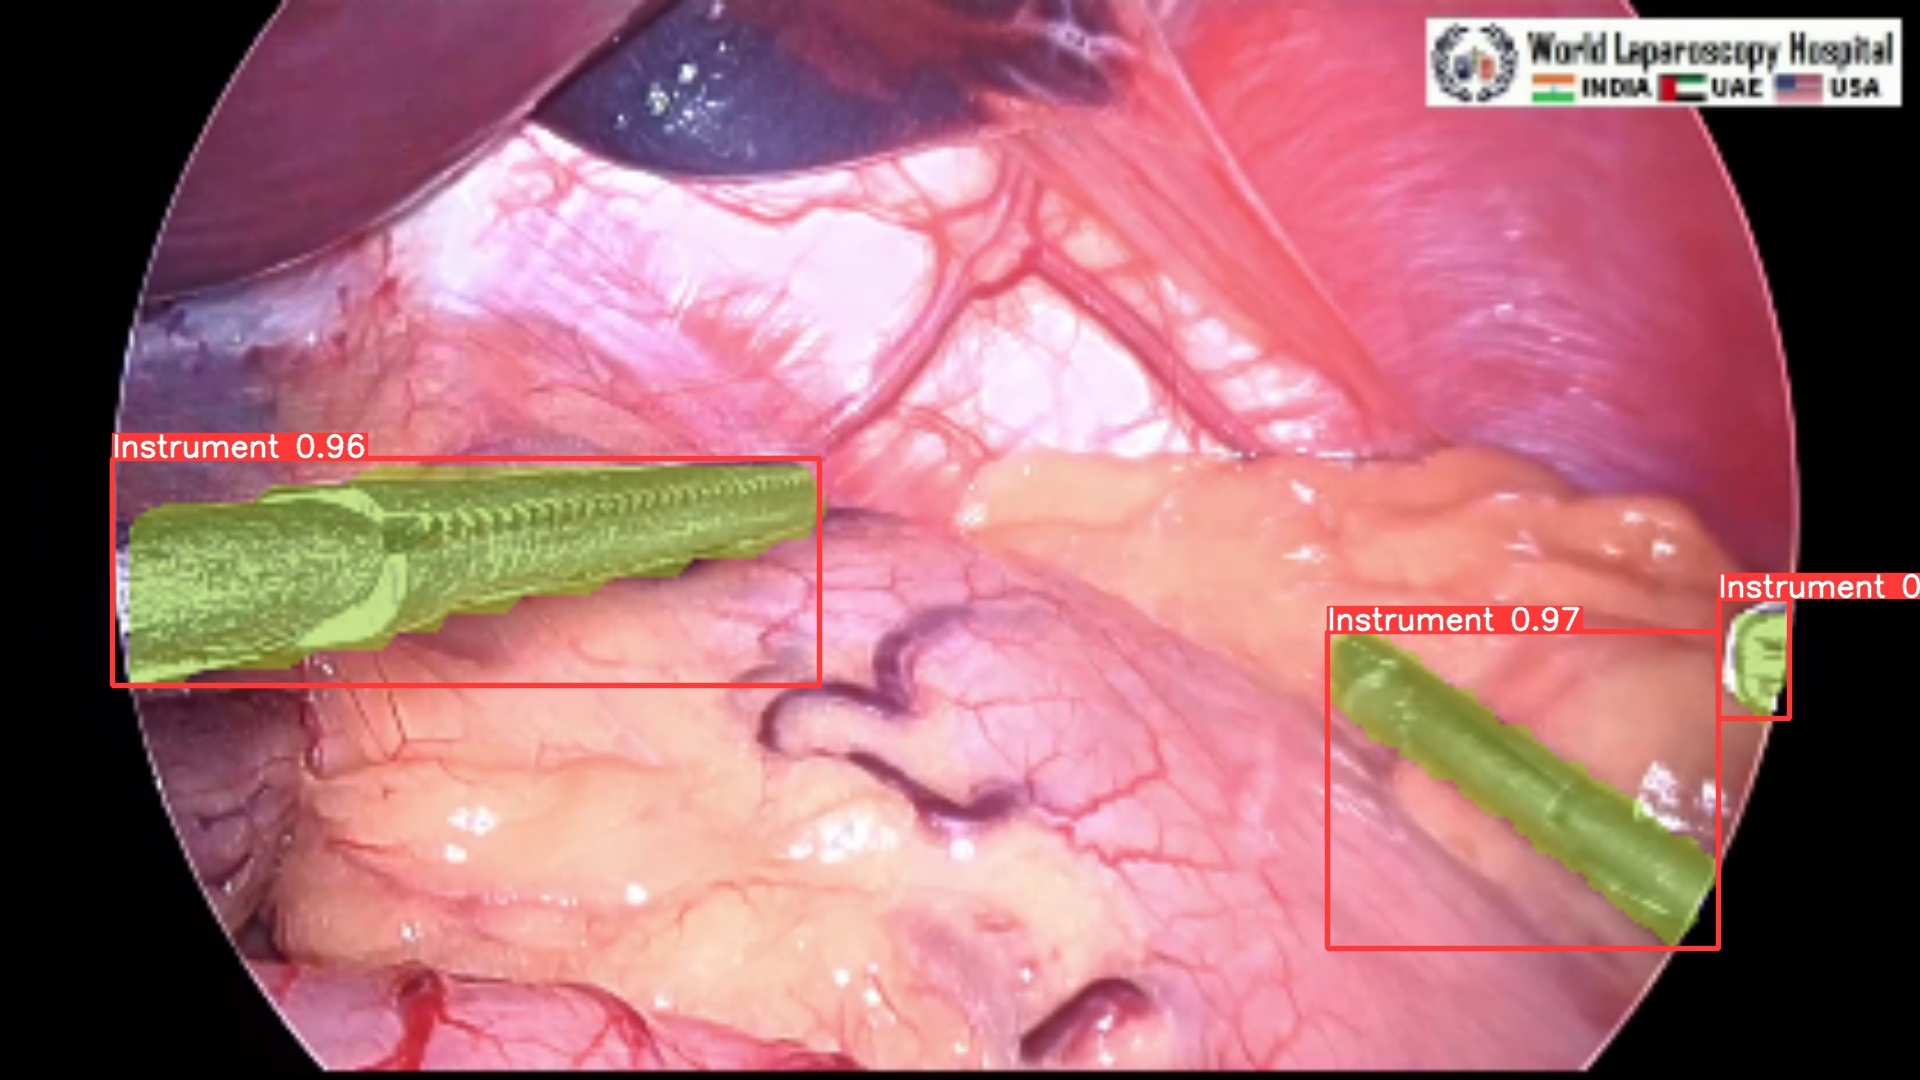

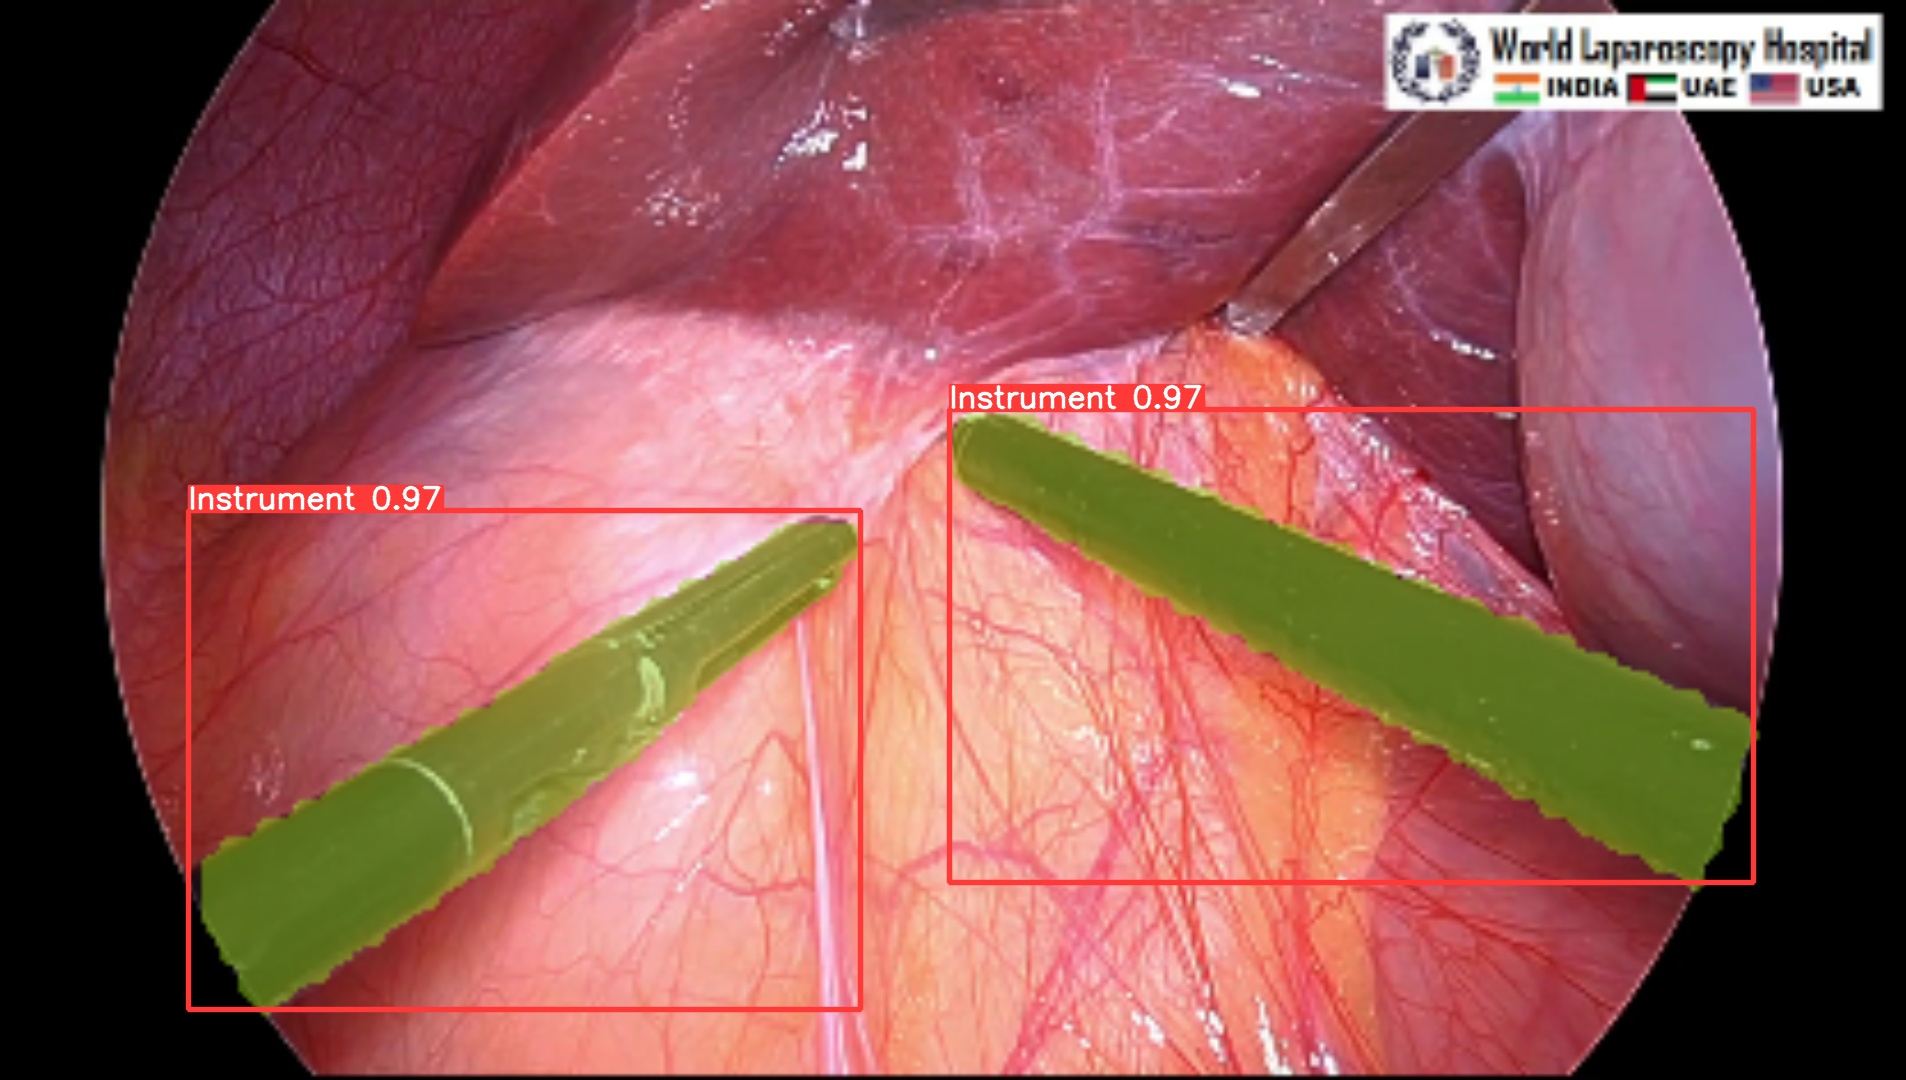

In [7]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/predict-seg/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")